In [2]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
df["cabin_null"] = np.where(df["Cabin"].isnull(),1,0)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
df.cabin_null.value_counts()

1    687
0    204
Name: cabin_null, dtype: int64

In [10]:
df.groupby(["Survived"])["cabin_null"].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

##new pipeline

In [11]:
df1 = pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df1.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

########mean mode median method

In [13]:
def nan_fill(data,variable,median):
    data[variable+"med"] = data[variable].fillna(median)

In [14]:
median = df1["Age"].median()
median

28.0

In [15]:
nan_fill(df1,"Age",median)

In [16]:
df1.head()

,Survived,Age,Fare,Agemed
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
df1.Agemed.isnull().sum()

0

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

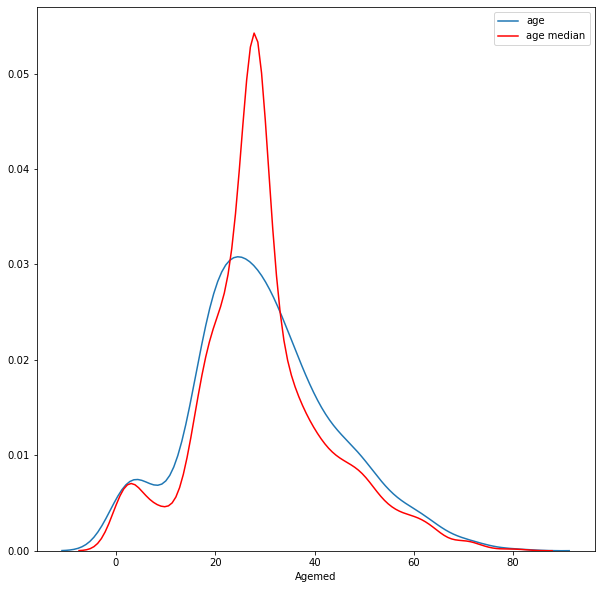

In [19]:
plt.figure(figsize=[10,10])
sn.distplot(df1["Age"],label="age",hist=False)
sn.distplot(df1["Agemed"],color="red",label="age median",hist=False)
plt.legend()

<font size=7>lets do random sampling to fill nan values

In [48]:
df2 = pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [49]:
df2.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [50]:
df2["Age"].dropna().sample(df2["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [51]:
def fill_nan(data,variable,median):
    data[variable+" median"] = data[variable].fillna(median)
    data[variable+" random"] = data[variable]
    random_var = data[variable].dropna().sample(data[variable].isnull().sum(),random_state=0)
    random_var.index = data[data[variable].isnull()].index
    data.loc[data[variable].isnull(),variable + " random"] = random_var

In [52]:
median = df2["Age"].median()
median

28.0

In [53]:
fill_nan(df2,"Age",median)

In [54]:
df2.head()

,Survived,Age,Fare,Age median,Age random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [55]:
import matplotlib.pyplot as plt
import seaborn as sn

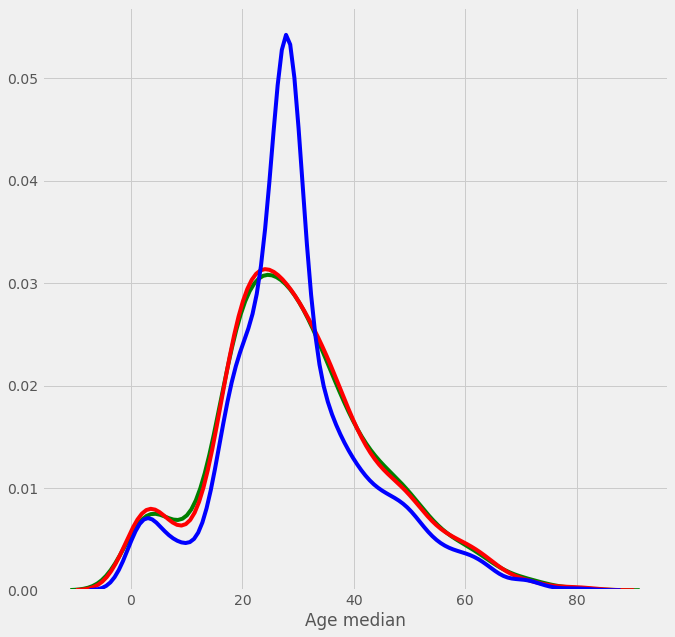

In [56]:
plt.figure(figsize=[10,10])
plt.style.use('fivethirtyeight')
sn.distplot(df2["Age"],hist=False,color="green")
sn.distplot(df2["Age random"],hist=False,color="red")
sn.distplot(df2["Age median"],hist=False,color="blue")
plt.show()

In [37]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<font size=6>cpaturing nan values with a new feature

In [1]:
import numpy as np
import pandas as pd

In [2]:
df3 = pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df3.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df3.dtypes

Survived      int64
Age         float64
Fare        float64
dtype: object

In [4]:
df3.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df3["Age_nan"] = np.where(df3["Age"].isnull(),1,0)

In [7]:
df3.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [8]:
df3["Age"] = df3.Age.fillna(df3.Age.median())

In [9]:
df3.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


<font size=5>end of didtribution imputation method

In [84]:
import numpy as np
import pandas as pd

In [85]:
df4 = pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


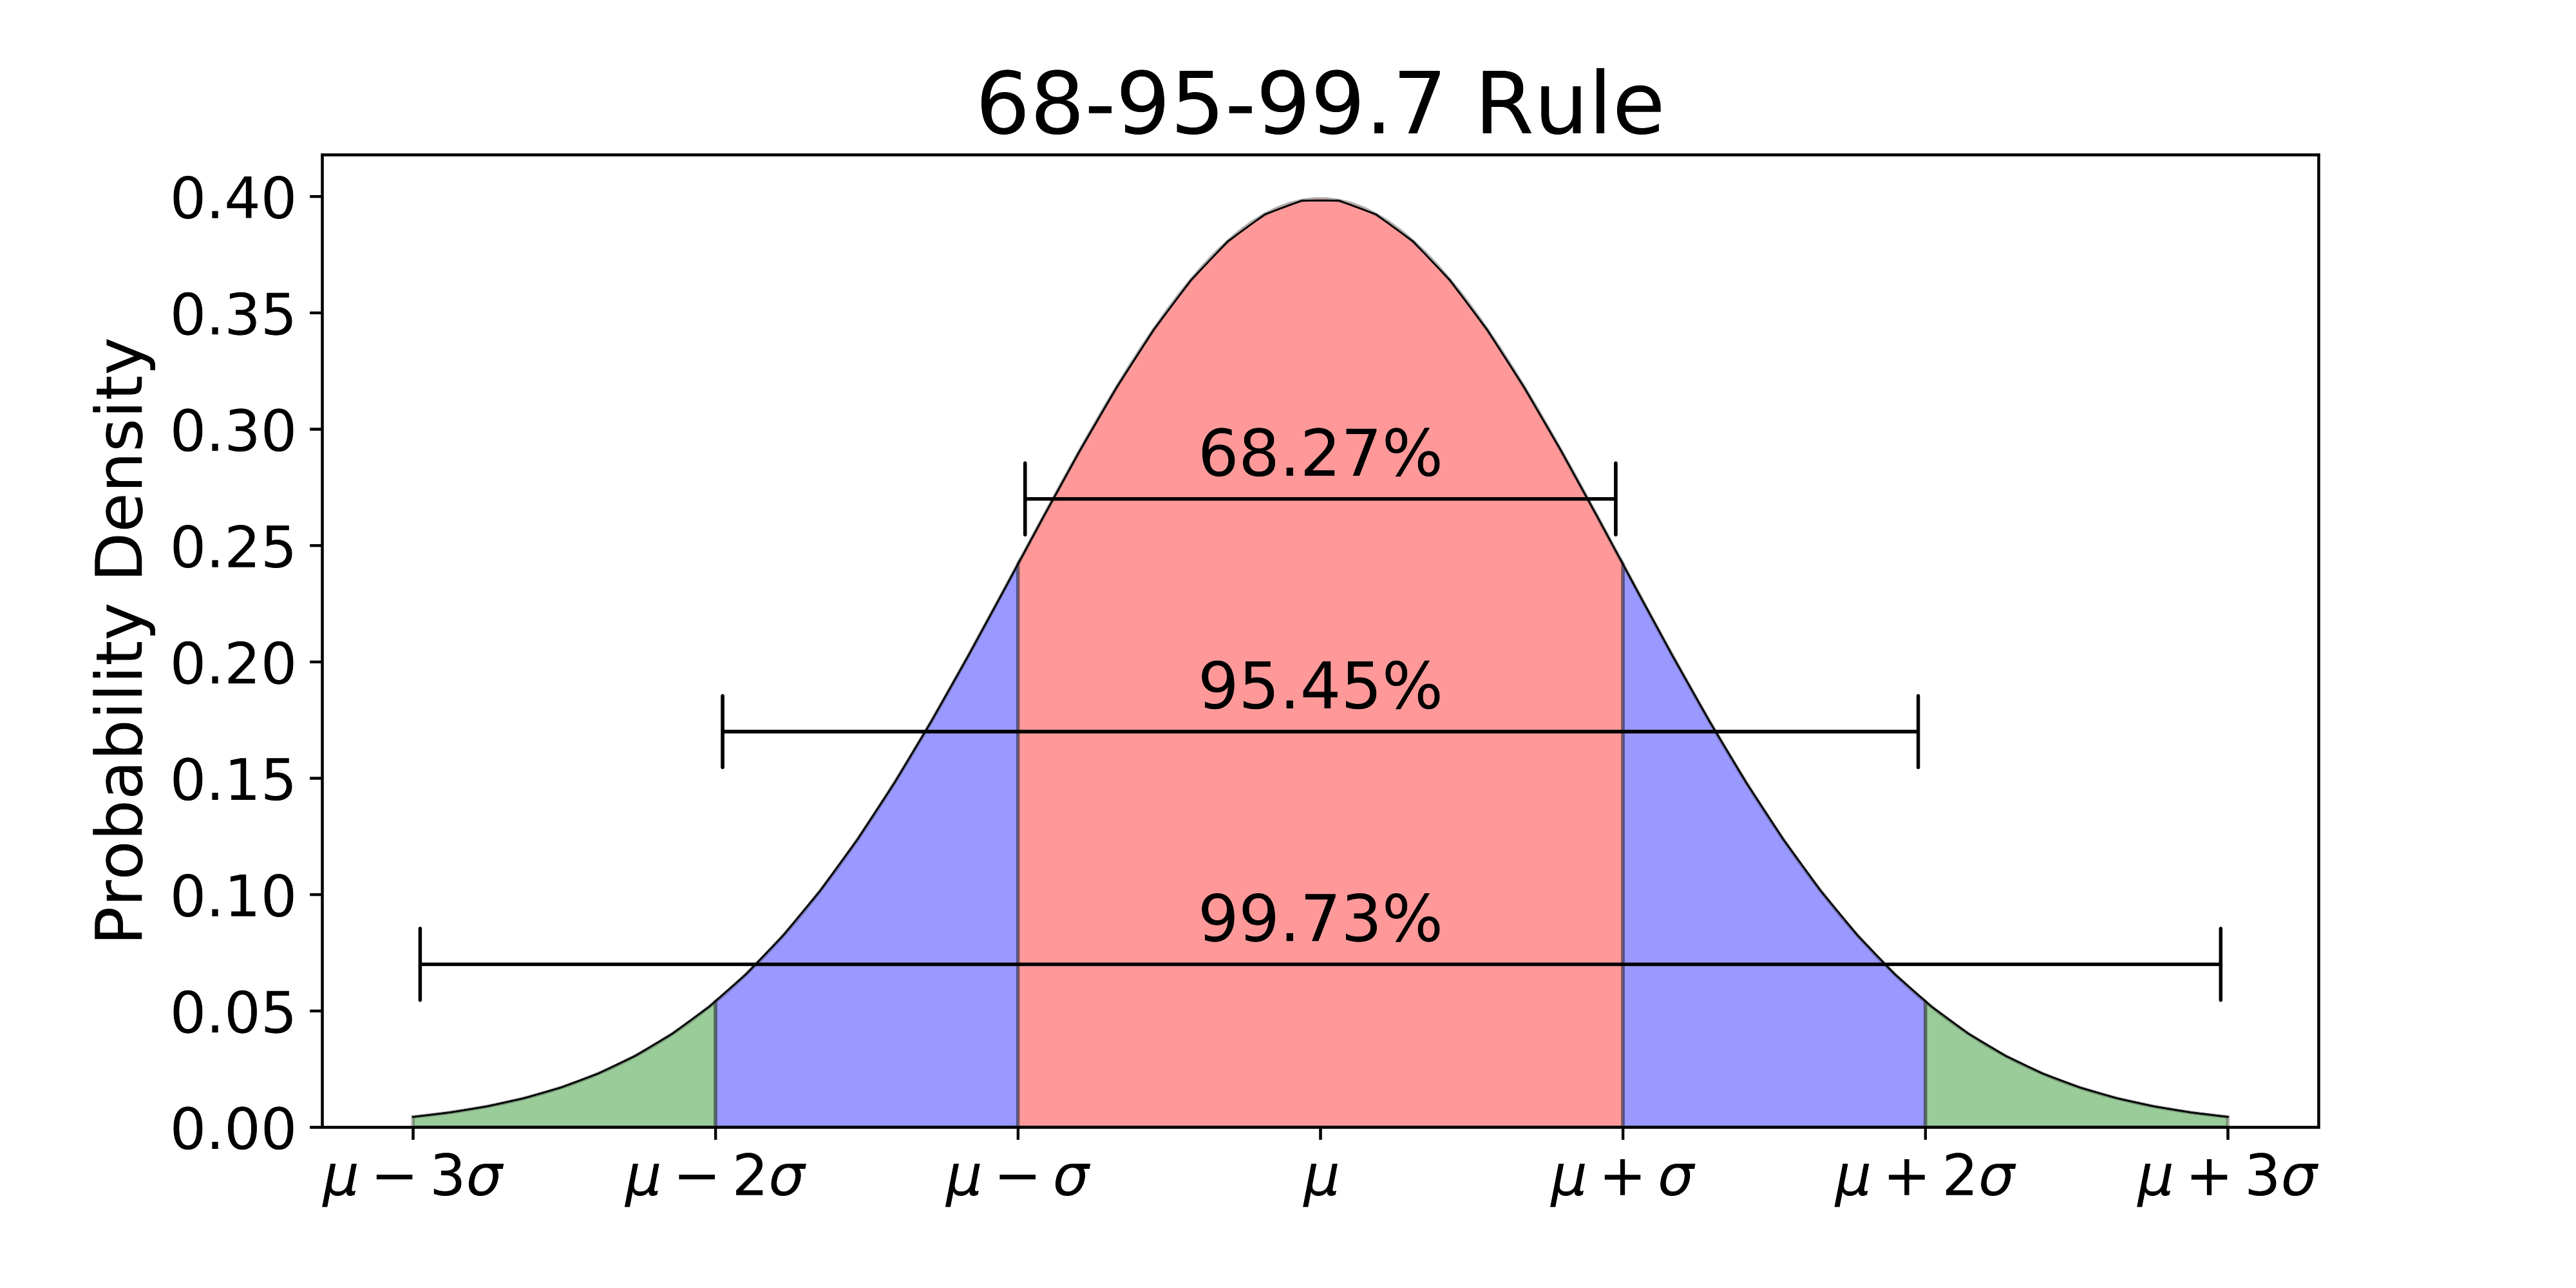

In [86]:
import matplotlib.pyplot as plt

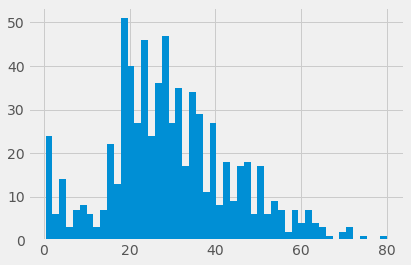

In [87]:
plt.hist(df4.Age,bins=50)
plt.show()

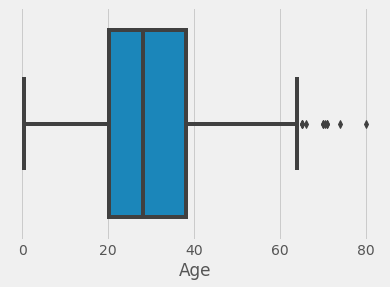

In [88]:
import seaborn as sn
sn.boxplot("Age",data=df4)
plt.show()

In [89]:
extreme_value = df4.Age.mean() + 3*df4.Age.std()
extreme_value

73.27860964406095

In [90]:
median = df4.Age.median()
median

28.0

In [91]:
def fill_nan(data,variable,extreme_value,median):
    data[variable+"extreme"] = data[variable].fillna(extreme_value)
    data[variable+ "mean"] = data[variable].fillna(median)

In [92]:
fill_nan(df4,"Age",extreme_value,median)

In [93]:
df4.head()

,Survived,Age,Fare,Ageextreme,Agemean
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [94]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


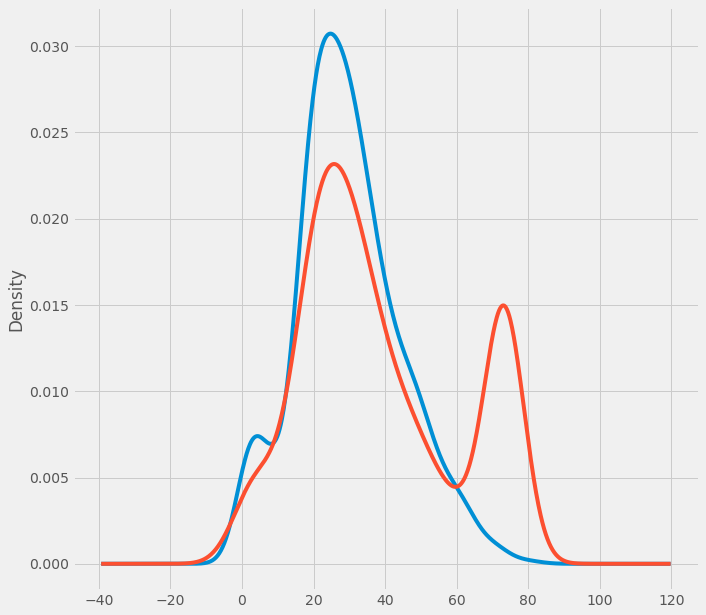

In [95]:
plt.figure(figsize=[10,10])
plt.style.use('fivethirtyeight')
df4.Age.plot(kind='kde')
df4.Ageextreme.plot(kind='kde')
plt.show()

(array([ 24.,   6.,  14.,   3.,   7.,   8.,   6.,   3.,   7.,  22.,  13.,
         51.,  40.,  27.,  46.,  24.,  36., 224.,  27.,  35.,  17.,  34.,
         29.,  11.,  27.,   8.,  18.,   9.,  17.,  18.,   6.,  17.,   6.,
          9.,   7.,   2.,   7.,   4.,   7.,   4.,   3.,   1.,   0.,   2.,
          3.,   0.,   1.,   0.,   0.,   1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <a list of 50 Patch objects>)

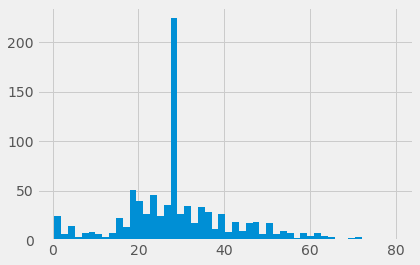

In [96]:
plt.hist(df4.Agemean,bins=50)

(array([ 24.,   6.,  14.,   3.,   7.,   8.,   6.,   3.,   7.,  22.,  13.,
         51.,  40.,  27.,  46.,  24.,  36.,  47.,  27.,  35.,  17.,  34.,
         29.,  11.,  27.,   8.,  18.,   9.,  17.,  18.,   6.,  17.,   6.,
          9.,   7.,   2.,   7.,   4.,   7.,   4.,   3.,   1.,   0.,   2.,
          3., 177.,   1.,   0.,   0.,   1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <a list of 50 Patch objects>)

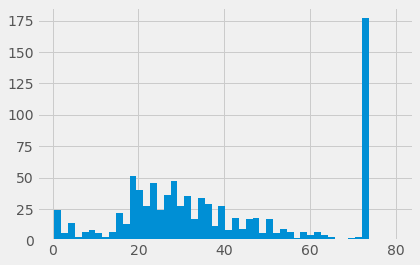

In [97]:
plt.hist(df4.Ageextreme,bins=50)

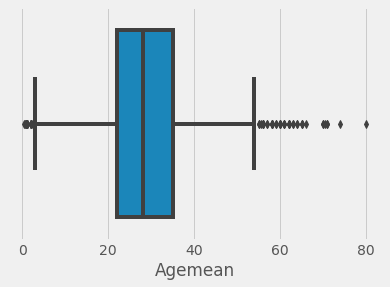

In [98]:
sn.boxplot("Agemean",data=df4)

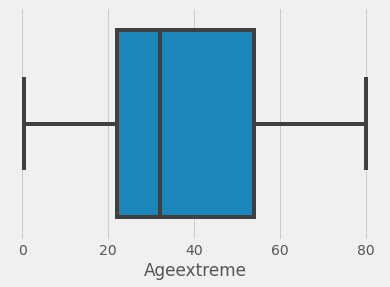

In [99]:
sn.boxplot("Ageextreme",data=df4)

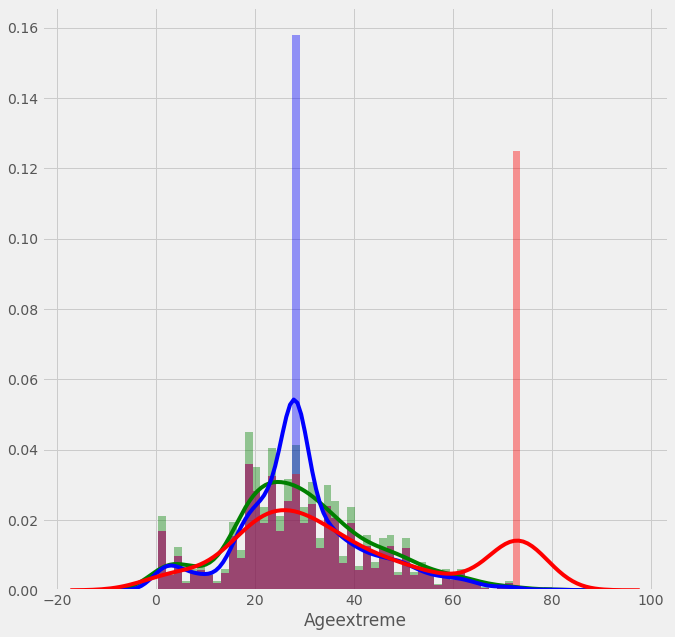

In [103]:
plt.figure(figsize=[10,10])
sn.distplot(df4.Age,color="green",bins=50)
sn.distplot(df4.Agemean,color="blue",bins=50)
sn.distplot(df4.Ageextreme,color="red",bins=50)

<font size=6>arbitrary value imputation

In [1]:
import pandas as pd
import numpy as np

In [4]:
df5 = pd.read_csv("titanic.csv",usecols=["Age","Fare","Survived"])
df5.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


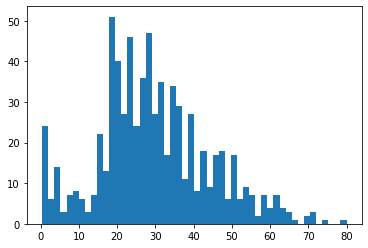

In [5]:
import matplotlib.pyplot as plt
plt.hist(df5["Age"],bins=50)
plt.show()

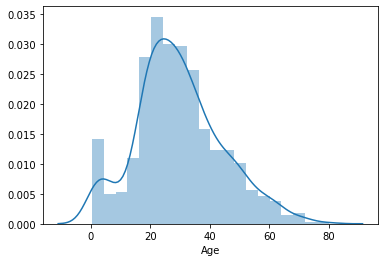

In [6]:
import seaborn as sn
sn.distplot(df5["Age"])

In [7]:
def fill_nan(data,variable):
    data[variable+"_80"] = data[variable].fillna(80)
    data[variable+"_100"] = data[variable].fillna(100)
    data[variable+"_0"] = data[variable].fillna(80)

In [8]:
fill_nan(df5,"Age")

In [9]:
df5.head()

,Survived,Age,Fare,Age_80,Age_100,Age_0
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


In [17]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


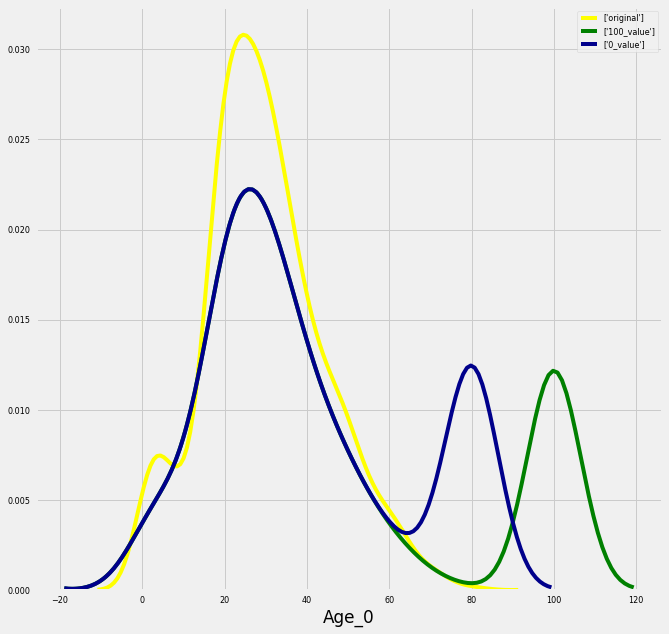

In [27]:
plt.figure(figsize=[10,10])
plt.style.use('fivethirtyeight')
sn.distplot(df5["Age"],hist=False,color="yellow",label=["original"])
#sn.distplot(df5["Age_80"],hist=False,color="red",label=["80_value"])
sn.distplot(df5["Age_100"],hist=False,color="green",label=["100_value"])
sn.distplot(df5["Age_0"],hist=False,color="darkblue",label=['0_value'])

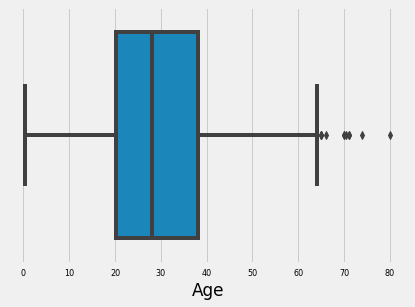

In [23]:
sn.boxplot(df5["Age"],data=df5)

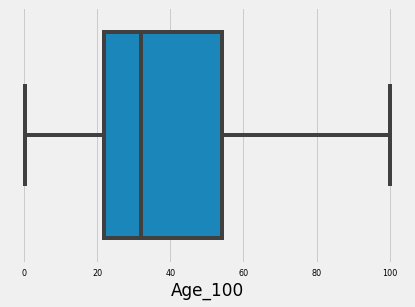

In [24]:
sn.boxplot(df5["Age_100"],data=df5)

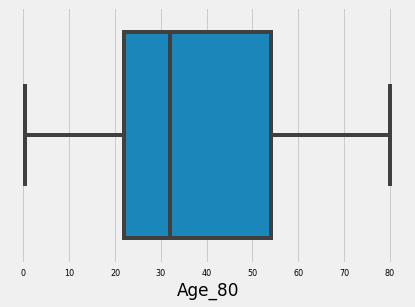

In [25]:
sn.boxplot(df5["Age_80"],data=df5)